# 유튜브 랭킹 데이터 수집하기

> 2022/09-01:
> 직장인을 위한 데이터 분석 실무/3장

## - 필요 모듈 설치

최신 Selenium is upgraded to v4.x

```
pip3 install -U selenium
pip3 install webdriver-manager
```


Selenium 3 까지는 selenium 만 설치해도 충분.

```
pip install --user selenium
```

In [ ]:
! pip install -U selenium

In [ ]:
! pip install webdriver-manager

# 1. 유튜브 랭킹 데이터 수집하기

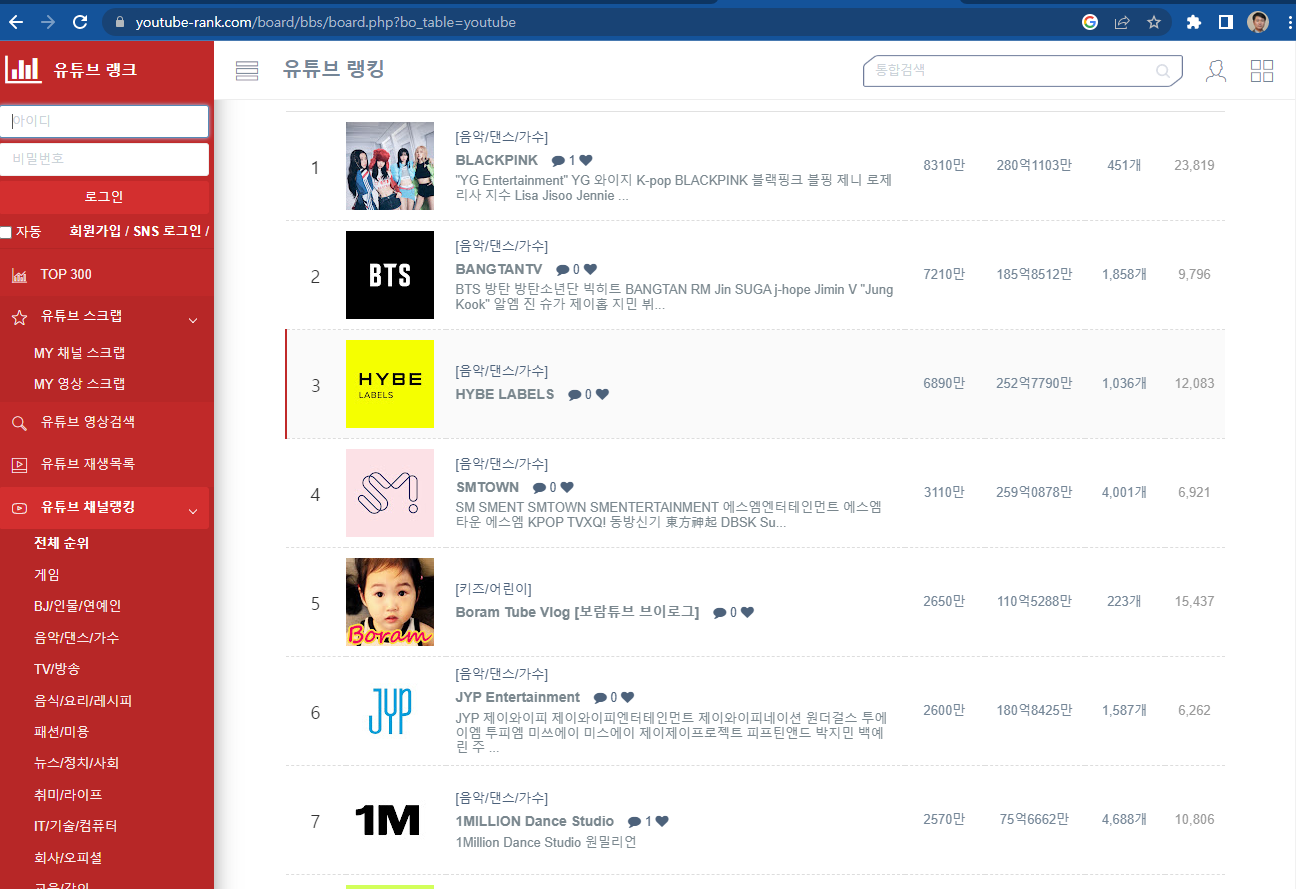

In [1]:
# 라이브러리 추가하기
from selenium import webdriver
webdriver.__version__

'4.8.2'

In [2]:
from bs4 import BeautifulSoup 
import time
import pandas as pd

In [3]:
# Selenium v4 compatible Code Block
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://www.google.com")
driver.quit()

[WDM] - Downloading: 100%|█████████████████████████████████████████████████████████████████████████████████| 7.05M/7.05M [00:00<00:00, 10.6MB/s]


In [4]:
# Selenium v3 : webdriver로 크롬 브라우저 실행하기
# browser = webdriver.Chrome('c:/playwithdata/chromedriver.exe')


### 유튜브 랭킹 접속

In [5]:
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# create a new chrome session
options = Options()
options.add_argument('headless') #--headless
options.add_argument('no-sandbox') #--no-sandbox

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube" 
driver.get(url)

driver.save_screenshot("youtube-rank.com-01.png") 

True

In [5]:
# 페이지 정보 가져오기
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# BeautifulSoup으로 tr 태그 추출하기
channel_list = soup.select('tr') 
print(len(channel_list), '\n')
print(channel_list[0])

102 

<tr>
<th class="rank"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=rank&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">순위 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="td_img">이미지</th>
<th class="subject">제목</th>
<th class="subscriber_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=subscriber_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">구독자순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="view_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=view_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">View순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="video_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=video_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">Video순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="hit"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=wr_hit&

In [7]:
# tr 태그 확인하기
channel_list = soup.select('form > table > tbody > tr')
print(len(channel_list))

100


In [8]:
# 채널 태그 출력 및 태그구조 확인하기
channel = channel_list[0]
print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/hZDUwjoeQqigphL4A1tkg9c6hVp5yXmbboBR7PYFUSFj5PIJSA483NB5v7b0XVoTN9GCku3tqQ=s88-c-k-c0x00ffffff-no-nd-rj" height="88" src="https://yt3.ggpht.com/hZDUwjoeQqigphL4A1tkg9c6hVp5yXmbboBR7PYFUSFj5PIJSA483NB5v7b0XVoTN9GCku3tqQ=s88-c-k-c0x00ffffff-no-nd-rj" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
							

In [9]:
# 카테고리 정보 추출하기
category = channel.select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


In [10]:
# 채널명 찾아오기
title = channel.select('h1 > a')[0].text.strip()
print(title)

BLACKPINK


In [ ]:
# 구독자 수, View 수, 동영상 수 추출하기
subscriber = channel.select('.subscriber_cnt')[0].text
view = channel.select('.view_cnt')[0].text
video = channel.select('.video_cnt')[0].text

print(subscriber)
print(view)
print(video)

In [ ]:
# 반복문으로 채널 정보 추출하기
channel_list = soup.select('tbody > tr') 
for channel in channel_list:
    tag_a =  channel.select('h1 > a')
    if tag_a:
        title = tag_a[0].text.strip()
        category = channel.select('p.category')[0].text.strip()
        subscriber = channel.select('.subscriber_cnt')[0].text
        view = channel.select('.view_cnt')[0].text
        video = channel.select('.video_cnt')[0].text 
        print(title, category, subscriber, view, video)

### 페이지별 URL 만들기

In [ ]:
# 페이지별 URL 만들기
page = 1
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
print(url)

#### 실습: 10페이지까지 크롤링 하기

1. 유튜브 랭킹 화면을 반복문으로 여러 페이지를 크롤링하자.
2. 데이터 프레임에 결과를 변환하고 엑셀 파일로 저장한다.

1. 유튜브 랭킹 화면을 반복문으로 여러 페이지를 크롤링하자.

In [ ]:
# 반복문으로 유튜브 랭킹 화면의 여러 페이지를 크롤링하기
results = []
for page in range(1,11):
    url = f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}" 
    driver.get(url)
    time.sleep(2)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')
    for channel in channel_list:
        tag_a =  channel.select('h1 > a')
        if tag_a:
            title = tag_a[0].text.strip() 
            category = channel.select('p.category')[0].text.strip()
            subscriber = channel.select('.subscriber_cnt')[0].text 
            view = channel.select('.view_cnt')[0].text
            video = channel.select('.video_cnt')[0].text
            data = [title, category, subscriber, view, video]
            results.append(data)

2. 데이터 프레임에 결과를 변환하고 엑셀 파일로 저장한다.

In [ ]:
# 데이터 칼럼명을 설정하고 엑셀 파일로 저장하기
df = pd.DataFrame(results, columns = ['title', 'category', 'subscriber', 'view', 'video'])
df.head()

In [ ]:
df.to_excel('youtube_rank.xlsx', index = False)

In [ ]:
del driver

In [ ]:
del df

# 2. 유튜브 랭킹 데이터 시각화하기

In [ ]:
# 라이브러리 추가하기
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 그래프에서 한글을 표기하기 위한 글꼴 변경(윈도우, macOS에 대해 각각 처리)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 전역 폰트 설정 사용
# font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
# font_path = '/Users/qkboo/Library/Fonts/NanumGothic.otf'
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

fontname = fm.FontProperties(fname=font_path, size=18).get_name()  # 폰트 패밀리 이름!
# plt.rc('font', family=fontname)
plt.rcParams["font.family"] = fontname
plt.rcParams["font.size"] = 12

# matplotlib 설정
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (10,3)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

plt.title('한글 타이틀...')

In [ ]:
# 엑셀 파일 불러오기
df = pd.read_excel('youtube_rank.xlsx')
df.head()

In [ ]:
# 데이터 살펴보기
df.info()

In [ ]:
# 가입자 데이터 살펴보기
df['subscriber'][0:10]

In [ ]:
df['subscriber'].str.replace('만', '0000')[0:10]

In [ ]:
# 가입자 데이터 변환
df['subscriber'] = df['subscriber'].str.replace('만', '0000')
df.head()

In [ ]:
# replaced_subscriber 시리즈 문자열 변경하기
df['replaced_subscriber'] = df['subscriber'].str.replace('만', '0000')
df.head()

In [ ]:
# 데이터 상세 정보
df.info()

In [ ]:
# Series 데이터 타입 변환하기
df['subscriber'] = df['subscriber'].astype('int')
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')
df.info()

In [ ]:
# 카테고리별 구독자 수, 채널 수 피봇 테이블 생성하기
pivot_df = df.pivot_table(index = 'category', values = 'replaced_subscriber', aggfunc = ['sum','count'])
pivot_df.head()

In [ ]:
# 데이터프레임의 칼럼명 변경하기
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.head()

In [ ]:
# 데이터 프레임의 인덱스 초기화 하기
pivot_df = pivot_df.reset_index()
pivot_df.head()

In [ ]:
# 데이터 프레임을 내림차순 정렬하기
pivot_df = pivot_df.sort_values(by='subscriber_sum', ascending=False)
pivot_df.head()

In [ ]:
# 카테고리별 구독자수 시각화 하기
plt.figure(figsize = (30,10))
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()

In [ ]:
# 카테고리별 채널 수 시각화하기
pivot_df = pivot_df.sort_values(by='category_count', ascending=False)
pivot_df.head()
plt.figure(figsize = (30,10))
plt.pie(pivot_df['category_count'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()